<a href="https://colab.research.google.com/github/JISU-byte/second-repository/blob/master/MainQuest3/%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [19]:
# 모집단(전체 데이터)의 평균과 표준편차
pop_mean = df['TotalPrice'].mean()
pop_std = df['TotalPrice'].std(ddof=0) # 모집단 표준편차

# 무작위 표본 1000개 추출
sample = df.sample(n=1000, random_state=42)

# 표본의 평균과 표준편차
sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std(ddof=1) # 표본 표준편차

# 표본평균의 표준오차(SE)
se = sample_std / np.sqrt(len(sample))

# 표본평균이 모집단평균에서 얼마나 떨어졌는지 (z-score)
z = (sample_mean - pop_mean) / se

In [20]:
# 결과 출력
print("===== 모집단(전체) 통계 =====")
print(f"모집단 평균: {pop_mean:.4f}")
print(f"모집단 표준편차: {pop_std:.4f}")

print("\n===== 표본(n=1000) 통계 =====")
print(f"표본평균: {sample_mean:.4f}")
print(f"표본 표준편차: {sample_std:.4f}")
print(f"표본평균의 표준오차: {se:.4f}")
print(f"표본평균의 z값: {z:.4f}")

# 중심극한정리 기반 해석
alpha_z = 1.96 # 95% 신뢰구간 기준 z값
if abs(z) < alpha_z:
  print(f"\n→ |z| = {abs(z):.2f} < 1.96 이므로, 표본평균은 모집단 평균과 통계적으로 유의미한 차이가 없습니다.")
  print("   즉, 표본은 모집단을 잘 대표하며 중심극한정리에 따라 표본평균이 모집단 평균에 근사합니다.")
else:
  print(f"\n→ |z| = {abs(z):.2f} ≥ 1.96 이므로, 표본평균이 모집단평균과 통계적으로 차이가 있습니다.")
  print("   이는 표본이 모집단의 평균에서 벗어난 극단적 표본일 가능성이 있습니다.")

===== 모집단(전체) 통계 =====
모집단 평균: 17.9878
모집단 표준편차: 378.8105

===== 표본(n=1000) 통계 =====
표본평균: 16.8321
표본 표준편차: 64.4673
표본평균의 표준오차: 2.0386
표본평균의 z값: -0.5669

→ |z| = 0.57 < 1.96 이므로, 표본평균은 모집단 평균과 통계적으로 유의미한 차이가 없습니다.
   즉, 표본은 모집단을 잘 대표하며 중심극한정리에 따라 표본평균이 모집단 평균에 근사합니다.


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [27]:
from scipy import stats

# 주문이 가장 많은 상위 두 국가 찾기
top2_countries = df['Country'].value_counts().head(2).index.tolist()
country_a, country_b = top2_countries[0], top2_countries[1]

print("주문이 가장 많은 상위 2개 국가:", country_a, "vs", country_b)

# 각 국가의 TotalPrice 데이터 추출
a_data = df[df['Country'] == country_a]['TotalPrice'].dropna()
b_data = df[df['Country'] == country_b]['TotalPrice'].dropna()

# 기초 통계 비교
print("\n===== 기초 통계 =====")
print(f"{country_a} 평균: {a_data.mean():.4f}, 표준편차: {a_data.std():.4f}, n={len(a_data)}")
print(f"{country_b} 평균: {b_data.mean():.4f}, 표준편차: {b_data.std():.4f}, n={len(b_data)}")

# 등분산 검정 (Levene test)
levene_stat, levene_p = stats.levene(a_data, b_data)
equal_var = (levene_p > 0.05)
print("\nLevene 등분산성 검정 p-value:", round(levene_p, 4))
print("등분산성 가정:", "만족(equal variances)" if equal_var else "불만족(unequal variances)")

주문이 가장 많은 상위 2개 국가: United Kingdom vs Germany

===== 기초 통계 =====
United Kingdom 평균: 16.5251, 표준편차: 394.8391, n=495478
Germany 평균: 23.3489, 표준편차: 37.3248, n=9495

Levene 등분산성 검정 p-value: 0.6125
등분산성 가정: 만족(equal variances)


In [28]:
# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(a_data, b_data, equal_var=equal_var)

print("\n===== 독립표본 t-검정 결과 =====")
print(f"t-통계량: {t_stat:.4f}")
print(f"p-값: {p_value:.6f}")

# 통계적 해석
alpha = 0.05
if p_value < alpha:
  print(f"\n→ p-value < {alpha} 이므로 귀무가설 기각.")
  print("   즉, 두 국가의 'TotalPrice' 평균은 통계적으로 유의미한 차이가 있습니다.")
else:
  print(f"\n→ p-value >= {alpha} 이므로 귀무가설 채택.")
  print("   즉, 두 국가의 'TotalPrice' 평균 차이는 통계적으로 유의하지 않습니다.")

# 오류 개념 해석
print("\n===== 요류 개념 정리 =====")
print("- 귀무가설: 두 국가의 평균 TotalPrice는 같다.")
print("- 대립가설: 두 국가의 평균 TotalPrice는 다르다.")
print("\n1종 오류:")
print("   실제로 두 국가의 평균이 같은데, 통계적으로 다르다고 잘못 결론내리는 오류(false positive).")
print("   이 오류의 확률은 유의수준 α(보통 0.05)로 통제됨.")
print("\n2종 오류:")
print("   실제로 두 국가의 평균이 다른데, 통계적으로 차이가 없다고 결론내리는 오류(false negative).")
print("   표본 크기가 작거나 분산이 크면 2종 오류 확률이 증가함.")



===== 독립표본 t-검정 결과 =====
t-통계량: -1.6839
p-값: 0.092198

→ p-value >= 0.05 이므로 귀무가설 채택.
   즉, 두 국가의 'TotalPrice' 평균 차이는 통계적으로 유의하지 않습니다.

===== 요류 개념 정리 =====
- 귀무가설: 두 국가의 평균 TotalPrice는 같다.
- 대립가설: 두 국가의 평균 TotalPrice는 다르다.

1종 오류:
   실제로 두 국가의 평균이 같은데, 통계적으로 다르다고 잘못 결론내리는 오류(false positive).
   이 오류의 확률은 유의수준 α(보통 0.05)로 통제됨.

2종 오류:
   실제로 두 국가의 평균이 다른데, 통계적으로 차이가 없다고 결론내리는 오류(false negative).
   표본 크기가 작거나 분산이 크면 2종 오류 확률이 증가함.


## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주중/주말 구분
df['IsWeekend'] = np.where(df['DayOfWeek'] >= 5, 'Weekend', 'Weekday')

# 그룹별 중심결향치, 변산성 분위수 계산
group_stats = df.groupby('IsWeekend')['UnitPrice'].agg(
    mean='mean',
    median='median',
    std='std',
    var='var',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
).round(4)

print("===== 주중 vs 주말 UnitPrice 통계 요약 =====")
print(group_stats)

===== 주중 vs 주말 UnitPrice 통계 요약 =====
             mean  median       std         var   q25   q75
IsWeekend                                                  
Weekday    4.8434    2.10  103.0321  10615.6049  1.25  4.13
Weekend    2.8878    1.85    7.9595     63.3536  1.25  3.75


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

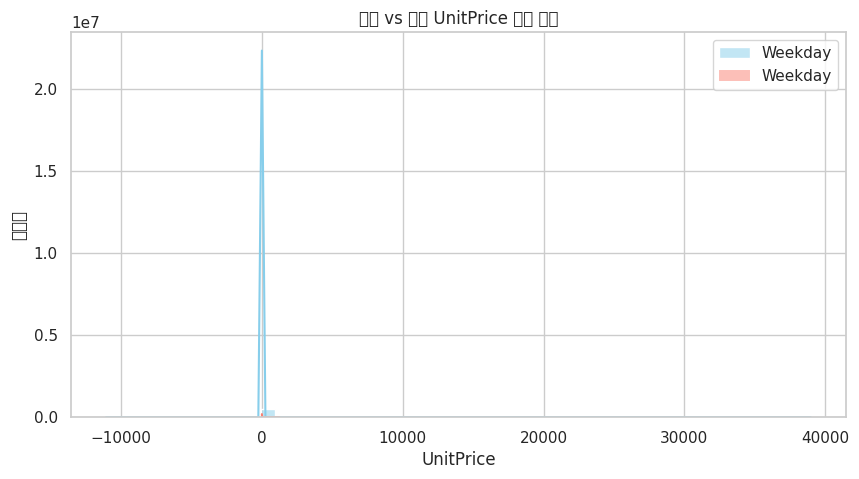

/tmp/ipython-input-1653218745.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsWeekend', y='UnitPrice', data=df, palette=['skyblue', 'salmon'])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\

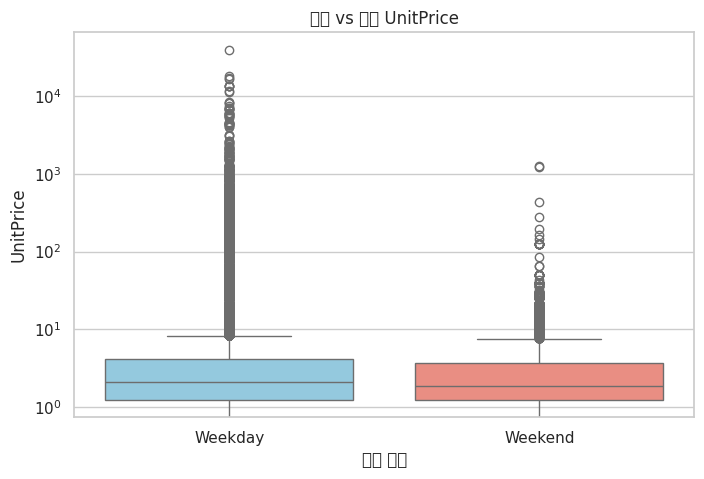

In [33]:
# 이상치 제거: UnitPrice가 0보다 크고, 상위 99% 이하 데이터만 사용
filtered_df = df[(df['UnitPrice'] > 0) &
                 (df['UnitPrice'] <= df['UnitPrice'].quantile(0.99))]


# 히스토그램 시각화
plt.figure(figsize=(10,5))
sns.histplot(df[df['IsWeekend']=='Weekday']['UnitPrice'],
             bins=50, color='skyblue', label='Weekday', kde=True)
sns.histplot(df[df['IsWeekend']=='Weekend']['UnitPrice'],
             bins=50, color='salmon', label='Weekday', kde=True)
plt.legend()
plt.title('주중 vs 주말 UnitPrice 분포 비교')
plt.xlabel('UnitPrice')
plt.ylabel('빈도수')
plt.show()

# 상자수염그림(Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='IsWeekend', y='UnitPrice', data=df, palette=['skyblue', 'salmon'])
plt.yscale('log')
plt.title('주중 vs 주말 UnitPrice')
plt.xlabel('요일 구분')
plt.ylabel('UnitPrice')
plt.show()

주중과 주말의 UnitPrice 분포를 비교한 결과,
두 구간 모두 오른쪽으로 치우친 분포를 보였으며,
대부분의 거래는 낮은 단가(10 이하)에 집중되어 있다.

로그 스케일 Boxplot을 통해 확인한 결과,
주중의 이상치가 주말보다 많아 고가 상품 거래가 더 빈번하게 발생했음을 알 수 있다.
반면, 주말은 전반적으로 변동성이 작고 안정적인 단가 분포를 보였다.

따라서 요일에 따른 판매 단가의 전반적 수준에는 큰 차이가 없지만,
주중에는 고가 상품이 포함된 다양한 거래가 더 활발하게 이루어지는 경향이 있다고 결론지을 수 있다.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [34]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# 필요 변수만 선택
data = df[['Quantity', 'UnitPrice', 'Country', 'InvoiceDate']].copy()

# 날짜 변수 처리
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data = data.dropna(subset=['InvoiceDate'])

# 요일, 월 변수 생성
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek  # 0=월, 6=일
data['InvoiceMonth'] = data['InvoiceDate'].dt.month


# 결측치 제거
data = data.dropna(subset=['Quantity', 'UnitPrice', 'Country'])

# 이상치 제거 (단가나 수량이 0 이하인 경우 제거)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# 국가 변수 인코딩
encoder = LabelEncoder()
data['Country_encoded'] = encoder.fit_transform(data['Country'])

In [35]:
# 독립변수와 종속변수 지정
X = data[['UnitPrice', 'Country_encoded', 'DayOfWeek', 'InvoiceMonth']]
y = data['Quantity']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모델 적합
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     40.09
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.23e-33
Time:                        07:32:57   Log-Likelihood:            -3.4274e+06
No. Observations:              530104   AIC:                         6.855e+06
Df Residuals:                  530099   BIC:                         6.855e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.0733      1.304     

- 단가가 높을수록 판매량은 통계적으로 우의하게 감소함.
- 국가는 판매 수량에 유의한 차이를 보임
- 요일 및 월별 요인은 통계적으로 유의하지 않음.
- 전체적으로 R2가 매우 낮아, 현재 변수들만으로 판매량을 설명하기는 어렵다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# 필요한 변수만 선택
data = df[['InvoiceNo', 'Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 결측치 제거
data = data.dropna()

# 이상치 제거 (단가나 수량이 0인 경우)
data = data[(data['UnitPrice'] > 0) & (data['Quantity'] != 0)]

In [37]:
# Quantity가 음수면 반품(1), 양수면 정상 구매(0)
data['IsReturn'] = np.where(data['Quantity'] < 0, 1, 0)

# 로지스틱 회귀에서는 Quantity 대신 IsReturn을 종속변수로 사용

In [38]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 인코딩
encoder = LabelEncoder()
data['Country_encoded'] = encoder.fit_transform(data['Country'])

# 독립 변수와 종속 변수 지정
X = data[['UnitPrice', 'Country_encoded', 'DayOfWeek', 'InvoiceMonth']]
y = data['IsReturn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
# 모델 정의 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [41]:
# 혼동행렬
cm = confusion_matrix(y_test, y_pred)

# 다양한 평가지표 계산
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("혼동행렬:\n", cm)
print(f"\n정확도(Accuracy): {acc:.4f}")
print(f"정밀도(Precision): {prec:.4f}")
print(f"재현율(Recall): {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print("\n상세 리포트:\n", classification_report(y_test, y_pred))

혼동행렬:
 [[106005     16]
 [  1847     11]]

정확도(Accuracy): 0.9827
정밀도(Precision): 0.4074
재현율(Recall): 0.0059
F1-score: 0.0117

상세 리포트:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    106021
           1       0.41      0.01      0.01      1858

    accuracy                           0.98    107879
   macro avg       0.70      0.50      0.50    107879
weighted avg       0.97      0.98      0.97    107879



모델의 성능을 더 높일 수 있는 방안에 대한 ChatGPT의 답변
->
데이터 균형 조정, 특성(Feature) 확장, 특성 변환, 모델 고도화, 평가지표 개선